In [7]:
import os
import inspect

# Image loader
from IPython.display import Image

# Numpy library:
import numpy as np

# Astropy tools:
from astropy.utils.data import download_file
from astropy.io import fits

# The JWST models:
from jwst import datamodels

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Use this version if you want interactive plots
# %matplotlib notebook

# Use this version for non-interactive plots (easier scrolling of the notebook)
%matplotlib inline

# These gymnastics are needed to make the sizes of the figures
# be the same in both the inline and notebook versions
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80

In [10]:
def create_image(data_2d, title=None):
    ''' Function to generate a 2D image of the data, 
    with an option to highlight a specific pixel.
    '''
    
    fig = plt.figure(figsize=(8, 8))
    ax = plt.subplot()
    plt.imshow(data_2d, origin='lower', cmap='gray', vmin=4000, vmax=12000)

    plt.xlabel('Pixel column')
    plt.ylabel('Pixel row')
    
    if title:
        plt.title(title)

    fig.tight_layout()
    plt.subplots_adjust(left=0.15)
    plt.colorbar(label='DN')

In [11]:
def plot_ramp(groups, signal, title=None):
    ''' Function to generate the ramp for pixel.
    '''
    
    fig = plt.figure(figsize=(8, 8))
    ax = plt.subplot()
    plt.plot(groups, signal, marker='o')
        
    plt.xlabel('Groups')
    plt.ylabel('Signal (DN)')
    fig.tight_layout()
    plt.subplots_adjust(left=0.15)
    
    if title:
        plt.title(title)

In [12]:
# Data for the notebook
uncal_obs_link = "https://stsci.box.com/shared/static/mpbrc3lszdjif6kpcw1acol00e0mm2zh.fits"
uncal_obs = "example_nircam_imaging_uncal.fits"
demo_file = download_file(uncal_obs_link+uncal_obs, cache=True)

# Data for the exercise 
exercise_obs_link = "https://stsci.box.com/shared/static/l1aih8rmwbtzyupv8hsl0adfa36why30.fits"
exercise_obs = "example_exercise_uncal.fits"
demo_ex_file = download_file(exercise_obs_link+exercise_obs, cache=True)

# Create local links to the cached copy - this is not necessary - you can use the `demo_file`/`demo_ex_file` 
# names directly.  But this is a convenient to see what you've downloaded and remind yourself laiter
os.symlink(demo_file, uncal_obs)
os.symlink(demo_ex_file, exercise_obs)  

In [13]:
# Let's take a high level look at our uncalibrated file with .info()
fits.info(uncal_obs)

Filename: example_nircam_imaging_uncal.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      88   ()      
  1  SCI           1 ImageHDU        48   (2048, 2048, 5, 1)   int16 (rescales to uint16)   
  2  ZEROFRAME     1 ImageHDU        12   (2048, 2048, 1)   int16 (rescales to uint16)   
  3  GROUP         1 BinTableHDU     36   5R x 13C   [I, I, I, J, I, 26A, I, I, I, I, 36A, D, D]   
  4  ASDF          1 BinTableHDU     11   1R x 1C   [3633B]   


In [14]:
# Use "science_data" as your data array name for the "SCI" extension 
science_data = fits.getdata(uncal_obs, 'SCI')

In [15]:
# What's the shape? 
science_data.shape

(1, 5, 2048, 2048)

In [16]:
# Let's get the primary and science headers (use: primary_headers, science_headers)
primary_headers = fits.getheader(uncal_obs,0)
science_headers = fits.getheader(uncal_obs,1)

In [17]:
# Print all the primary headers 
primary_headers

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2019-02-05T12:06:01.793' / [yyyy-mm-ddThh:mm:ss.ss] UTC date file cre
ORIGIN  = 'STScI   '           / Organization responsible for creating file     
FILENAME= 'jw1069001001_01203_00002_nrca1_uncal.fits' / Name of the file        
FILETYPE= 'raw     '           / Type of data in the file                       
DATAMODL= 'RampModel'          / Type of data model                             
TELESCOP= 'JWST    '           / Telescope used to acquire the data             
                                                                                
        Program information                                                     
                            

In [18]:
# Try finding all headers with "OBS" in the name
primary_headers['OBS*']

OBS_ID  = 'V01069001001P0000000001103' / Programmatic observation identifier    
OBSERVTN= '001     '           / Observation number                             
OBSLABEL= 'OBS1    '           / Proposer label for the observation             

In [19]:
# What's the observation ID, instrument, exposure type?
primary_headers['OBS_ID'],primary_headers['INSTRUME'],primary_headers['EXP_TYPE']

('V01069001001P0000000001103', 'NIRCAM', 'NRC_IMAGE')

In [20]:
# What about the data dimensions? Integrations, groups, xsize, ysize?
primary_headers['NINTS'], primary_headers['NGROUPS'], primary_headers['SUBSIZE1'], primary_headers['SUBSIZE2']

(1, 5, 2048, 2048)

In [21]:
# Use: integration, pixel_y, pixel_x, group
integration = 0
pixel_y = 741
pixel_x = 1798
group = -1  

In [22]:
# Set up our arrays to plot (use: groups, signal_adu)
groups = np.arange(0, primary_headers['NGROUPS'])
signal_adu = science_data[integration, :, pixel_y, pixel_x]

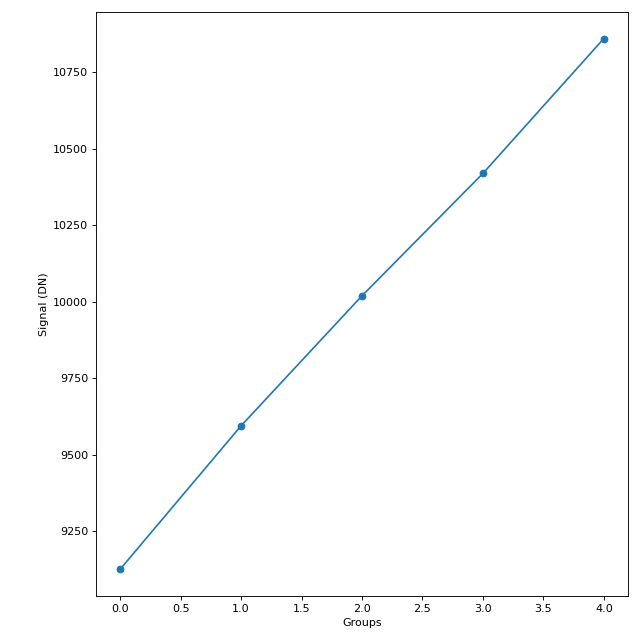

In [23]:
# Plot the ramp
plot_ramp(groups, signal_adu)

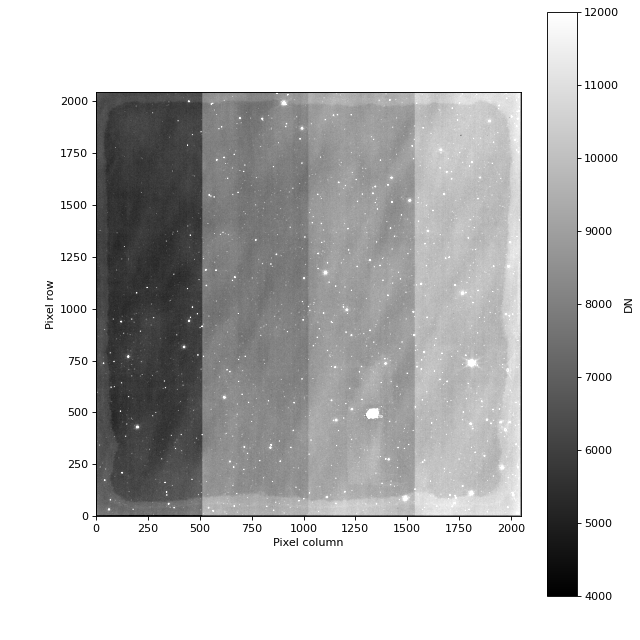

In [24]:
# Create an image of one integration and one group
create_image(science_data[integration, group, :, :])

In [26]:
# Here is a command to print a list of the current JWST data models 
inspect.getmembers(datamodels, inspect.isclass)

[('ABVegaOffsetModel',
  stdatamodels.jwst.datamodels.abvega_offset.ABVegaOffsetModel),
 ('AmiLgFitModel', stdatamodels.jwst.datamodels.amilgfitmodel.AmiLgFitModel),
 ('AmiLgModel', stdatamodels.jwst.datamodels.amilg.AmiLgModel),
 ('AmiOIModel', stdatamodels.jwst.datamodels.amioi.AmiOIModel),
 ('AsnModel', stdatamodels.jwst.datamodels.asn.AsnModel),
 ('BarshadowModel', stdatamodels.jwst.datamodels.barshadow.BarshadowModel),
 ('CameraModel', stdatamodels.jwst.datamodels.wcs_ref_models.CameraModel),
 ('CollimatorModel',
  stdatamodels.jwst.datamodels.wcs_ref_models.CollimatorModel),
 ('CombinedSpecModel',
  stdatamodels.jwst.datamodels.combinedspec.CombinedSpecModel),
 ('ContrastModel', stdatamodels.jwst.datamodels.contrast.ContrastModel),
 ('CubeModel', stdatamodels.jwst.datamodels.cube.CubeModel),
 ('DarkMIRIModel', stdatamodels.jwst.datamodels.darkMIRI.DarkMIRIModel),
 ('DarkModel', stdatamodels.jwst.datamodels.dark.DarkModel),
 ('DisperserModel',
  stdatamodels.jwst.datamodels.wcs_re

In [27]:
# Load up the RampModel (use: ramp)
ramp = datamodels.RampModel()

In [28]:
# Let's check out the info for this model
ramp.info()

root (AsdfObject)
├─meta (dict)
│ ├─model_type (str): RampModel
│ └─date (str): 2024-11-01T02:51:12.874
├─data (ndarray): shape=(0, 0, 0, 0), dtype=float32
├─pixeldq (ndarray): shape=(0, 0), dtype=uint32
├─groupdq (ndarray): shape=(0, 0, 0, 0), dtype=uint8
└─err (ndarray): shape=(0, 0, 0, 0), dtype=float32


In [29]:
# Open the uncal_obs file, letting the datamodel package decide which model is best, and use .info()
model = datamodels.open(uncal_obs)
model.info()

ModuleNotFoundError: ERROR loading embedded ASDF: No module named 'numpy.rec'

In [30]:
# Let's take a high level look at our uncalibrated file with .info()
fits.info(uncal_obs)

Filename: example_nircam_imaging_uncal.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      88   ()      
  1  SCI           1 ImageHDU        48   (2048, 2048, 5, 1)   int16 (rescales to uint16)   
  2  ZEROFRAME     1 ImageHDU        12   (2048, 2048, 1)   int16 (rescales to uint16)   
  3  GROUP         1 BinTableHDU     36   5R x 13C   [I, I, I, J, I, 26A, I, I, I, I, 36A, D, D]   
  4  ASDF          1 BinTableHDU     11   1R x 1C   [3633B]   


In [31]:
# Use "science_data" as your data array name for the "SCI" extension 
science_data = fits.getdata(uncal_obs, 'SCI')

In [32]:
# What's the shape? 
science_data.shape

(1, 5, 2048, 2048)

In [33]:
# Let's get the primary and science headers (use: primary_headers, science_headers)
primary_headers = fits.getheader(uncal_obs,0)
science_headers = fits.getheader(uncal_obs,1)

In [34]:
# Print all the primary headers 
primary_headers

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2019-02-05T12:06:01.793' / [yyyy-mm-ddThh:mm:ss.ss] UTC date file cre
ORIGIN  = 'STScI   '           / Organization responsible for creating file     
FILENAME= 'jw1069001001_01203_00002_nrca1_uncal.fits' / Name of the file        
FILETYPE= 'raw     '           / Type of data in the file                       
DATAMODL= 'RampModel'          / Type of data model                             
TELESCOP= 'JWST    '           / Telescope used to acquire the data             
                                                                                
        Program information                                                     
                            

In [35]:
# Create an ImageModel from scratch with size (1024, 1024), and search the schema for "instrument" keywords
im = datamodels.ImageModel((1024, 1024))
im.search_schema('instrument')

meta.instrument

meta.instrument.band

meta.instrument.ccc_state

meta.instrument.channel

meta.instrument.channel.anyOf

meta.instrument.channel.anyOf

meta.instrument.channel.anyOf

meta.instrument.coronagraph

meta.instrument.coronagraph.anyOf

meta.instrument.coronagraph.anyOf

meta.instrument.coronagraph.anyOf

meta.instrument.coronagraph.anyOf

meta.instrument.detector

meta.instrument.filter

meta.instrument.filter_position

meta.instrument.fixed_slit

meta.instrument.focus_position

meta.instrument.grating

meta.instrument.gwa_pxav

meta.instrument.gwa_pyav

meta.instrument.gwa_tilt

meta.instrument.gwa_xp_v

meta.instrument.gwa_xtilt

meta.instrument.gwa_yp_v

meta.instrument.gwa_ytilt

meta.instrument.lamp_mode

meta.instrument.lamp_state

meta.instrument.miri_fpe_side

meta.instrument.miri_ice_side

meta.instrument.module

meta.instrument.msa_configuration_id

meta.instrument.msa_metadata_file

meta.instrument.msa_metadata_id

meta.instrument.msa_state

meta.instrument.name


In [36]:
# Create empty DQ and data arrays using numpy, then load them into the ImageModel
data = np.empty((50, 50))
dq = np.empty((50, 50))
im = datamodels.ImageModel(data=data, dq=dq)

In [39]:
# Add the instrument name
im.meta.instrument.name = 'NIRCAM'
# Check the instrument name 
im.meta.instrument.name

'NIRCAM'

In [40]:
# Check the data shape and the DQ array 
im.data.shape

(50, 50)

In [41]:
# Load the exercise file ("exercise_obs") using FITS to get the headers (hint: getheader)
mystery_header = fits.getheader(exercise_obs, 'PRIMARY')

In [42]:
# Load the exercise file ("exercise_obs") using FITS to get the data (hint: getdata)
mystery_data = fits.getdata(exercise_obs,'SCI')

In [44]:
# How many extensions are there in this file? (hint: fits.info())
fits.info(exercise_obs)

Filename: example_exercise_uncal.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     121   ()      
  1  SCI           1 ImageHDU        50   (2048, 2048, 25, 1)   int16 (rescales to uint16)   
  2  ZEROFRAME     1 ImageHDU        12   (2048, 2048, 1)   int16 (rescales to uint16)   
  3  GROUP         1 BinTableHDU     36   25R x 13C   [I, I, I, J, I, 26A, I, I, I, I, 36A, D, D]   
  4  INT_TIMES     1 BinTableHDU     24   1R x 7C   [J, D, D, D, D, D, D]   
  5  ASDF          1 BinTableHDU     11   1R x 1C   [6502B]   


In [45]:
# What instrument and mode is this data for? (hint: INSTRUME, EXP_TYPE)
mystery_header['INSTRUME'], mystery_header['EXP_TYPE']

('NIRISS', 'NIS_WFSS')